<style type="text/css">
.reveal h1 {
    font-size: 2em;
}
</style>

<left><img width=25% src="img/cu_logo.svg"></left>

# Lecture 3: Unsupervised Learning, Clustering

__Milton Pividori__<br>Department of Biomedical Informatics<br>University of Colorado Anschutz Medical Campus

# Announcements

* **Assignment 01**: Cluster analysis on gene expression data
  * Available on Canvas.
  * Due in a week: Dec 2.
  * We will quickly review it at the end of today's lecture, and more in depth tomorrow after journal club.

* **Journal club** tomorrow:
  * See modality in lecture 1 slides.
    * Remember sending brief written document.

# Questions/Answers

* You can **open the lecture notebook** and run the code while we advance.
* More in-depth **mathematical details** for some lectures.
* Aishwarya: "how do we minimize a loss function with absolute values?"
  * [Lasso in sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) solves this using *coordinate descent*

# Agenda

### Part 1: What is Unsupervised Learning?
- Introduction to unsupervised learning and clustering
- Example with Iris dataset and K-Means algorithm
- Real-world applications

### Part 2: The Language of Unsupervised Learning
- Formal notation and components (model, objective, optimizer)
- K-Means algorithm details and implementation

### Part 3: Unsupervised Learning in Practice
- Underfitting and overfitting in unsupervised learning
- Hyperparameter tuning methods (Elbow method, Consensus Index)

### Hands-on Exercise
- Apply K-Means clustering algorithm

# Part 1: What is Unsupervised Learning?

We will start with a high-level overview of unsupervised learning and will introduce a dataset and an algorithm.

# Unsupervised Learning

We have a dataset *without* labels. Our goal is to learn *something interesting* about the structure of the data:

* __Clusters of related datapoints__. For example, we might want to discover groups of similar customers from the logs of an e-commerce website.

* __Embeddings and latent spaces__. Transform the data into another space for 1) visualization, or 2) better features.

* __Outliers__, i.e., particularly unusual or interesting datapoints. For example, suspicious financial transactions.

* __Denoised signals__. Recovering an image corrupted with white noise.

* __Generation__. Unconditionally create new samples, e.g., images.

# Components of Unsupervised Learning

In unsupervised learning, we also define a dataset and a learning algorithm.

$$ \text{Dataset} + \text{Learning Algorithm} \to \text{Unsupervised Model} $$

The unsupervised model describes interesting structure in the data. For instance, it can identify interesting hidden clusters.

# An Unsupervised Learning Dataset

As a first example of an unsupervised learning dataset, we will use our Iris flower example, but we will discard the labels.

We start by loading this dataset.

In [1]:
import numpy as np

np.set_printoptions(precision=2)
import pandas as pd

pd.options.display.float_format = "{:,.2f}".format
from sklearn import datasets

iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

We can visualize this dataset in 2D. Note that we are no longer using label information.

Text(0.5, 1.0, 'Dataset of Iris flowers')

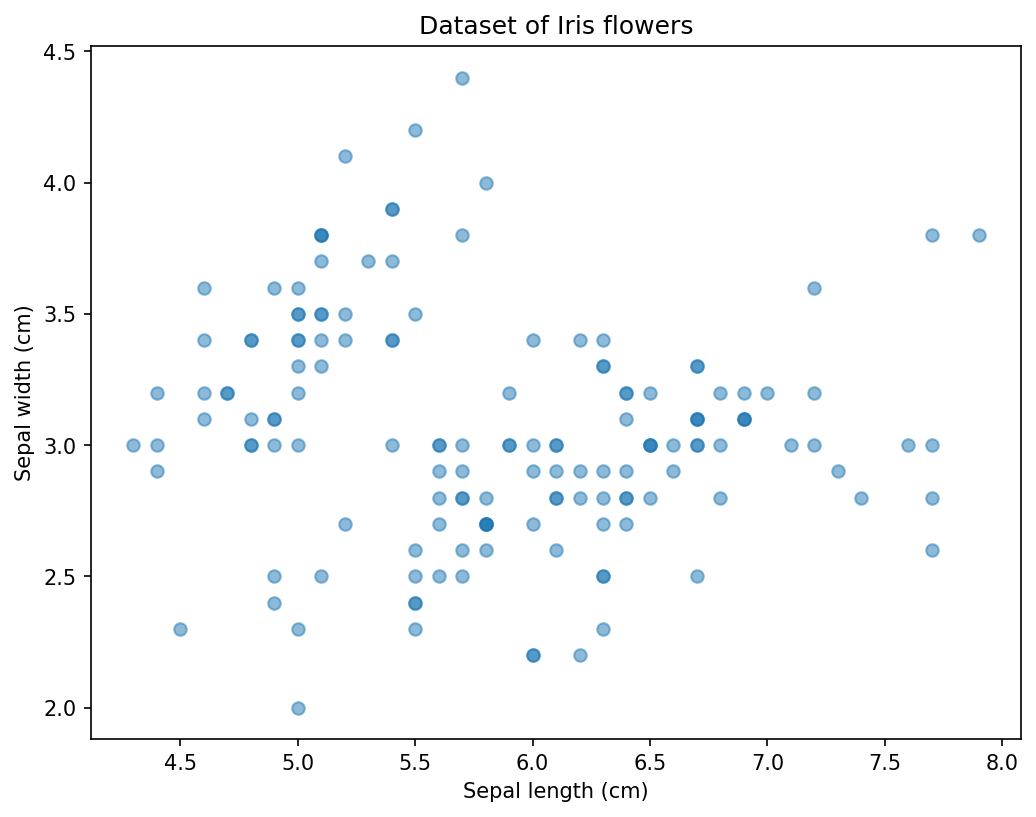

In [5]:
from matplotlib import pyplot as plt

plt.rcParams.update({"figure.figsize": [8, 6], "figure.dpi": 150})

# Visualize the Iris flower dataset
plt.scatter(iris.data[:, 0], iris.data[:, 1], alpha=0.5)
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Dataset of Iris flowers")

# An Unsupervised Learning Algorithm

We'll input this dataset into a popular unsupervised learning algorithm, __$K$-Means__.

* The algorithm seeks to find $K$ hidden clusters in the data.
<!-- * Each cluster is characterized by its centroid (its mean). -->
* The clusters reveal interesting structure in the data.

Running $K$-Means on this dataset identifies three clusters.

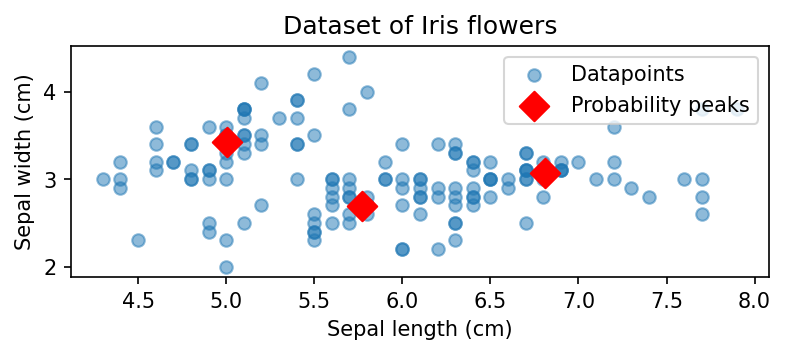

In [3]:
# fit K-Means with K=3
from sklearn import cluster

model = cluster.KMeans(n_clusters=3, n_init="auto")
model.fit(iris.data[:, [0, 1]])

# display the clusters
plt.scatter(iris.data[:, 0], iris.data[:, 1], alpha=0.5)
plt.scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker="D", c="r", s=100
)
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Dataset of Iris flowers")
plt.legend(["Datapoints", "Probability peaks"]) # or "centroids"

These clusters correspond to the three types of flowers found in the dataset, which we obtain from the labels.

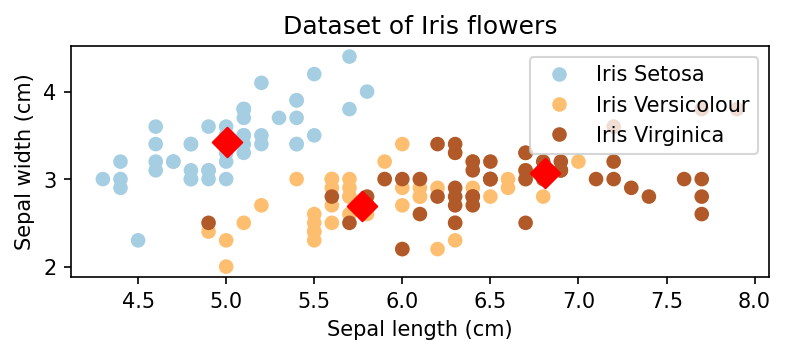

In [4]:
p1 = plt.scatter(
    iris.data[:, 0], iris.data[:, 1], alpha=1, c=iris.target, cmap="Paired"
)
plt.scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker="D", c="r", s=100
)
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Dataset of Iris flowers")
plt.legend(
    handles=p1.legend_elements()[0],
    labels=["Iris Setosa", "Iris Versicolour", "Iris Virginica"],
)

# Application: DNA Analysis

Dimensionality reduction applied to DNA data reveals geographic patterns corresponding to European countries:

<center><img width=50% src="img/dna_map.jpg"></center>

<https://www.nature.com/articles/nature07331>

# Application: Discovering Structure in Digits

Unsupervised learning can discover structure in digits without any labels.

<center><img width=40% src="img/aae_dim_reduc_2.png"></center>

# Unsupervised Learning in This Course

We will explore two types of unsupervised learning problems:
* Clustering
* Dimensionality Reduction

Next, we will start by setting up some notation.

<left><img width=25% src="img/cu_logo.svg"></left>
# Part 2: The Language of Unsupervised Learning

Next, let's look at how to define an unsupervised learning problem more formally.

# Components of an Unsupervised Learning Problem

At a high level, an unsupervised machine learning problem has the following structure:

$$ \underbrace{\text{Dataset}}_\text{Features} + \underbrace{\text{Learning Algorithm}}_\text{Model Class + Objective + Optimizer } \to \text{Unsupervised Model} $$

The unsupervised model describes interesting structure in the data. For instance, it can identify interesting hidden clusters.

# Unsupervised Dataset: Notation

We define a dataset of size $n$ for unsupervised learning as
$$\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}$$

Each $x^{(i)} \in \mathbb{R}^d$ denotes an input, a vector of $d$ attributes or features.

# Components of an Unsupervised Learning Algorithm

We can think of an unsupervised learning algorithm as consisting of three components:
* A __model class__: the set of possible unsupervised models we consider.
* An __objective__ function, which defines how good a model is.
* An __optimizer__, which finds the best predictive model in the model class according to the objective function.

# Model: Notation

We'll say that a model is a function
$$ f_\theta : \mathcal{X} \to \mathcal{Z} $$
that maps inputs $x \in \mathcal{X}$ to *some interesting output* $z \in \mathcal{Z}$. Models may have *parameters* $\theta \in \Theta$ living in a set $\Theta$.

"*Some interesting output*" can have many definitions (clusters, low-dimensional representations, etc.), and we will see many examples.

# Objective: Notation

We again define an *objective function* (also called a *loss function*)
$$J(\theta) : \Theta \to [0, \infty), $$
which describes the extent to which $f_\theta$ "fits" the data $\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}$.

# Optimizer: Notation

An optimizer finds a model $f_\theta \in \mathcal{M}$ with the smallest value of the objective $J$.
\begin{align*}
\min_{\theta \in \Theta} J(\theta)
\end{align*}

Intuitively, this is the function that best "fits" the data on the training dataset.

# Clustering

Clustering is the problem of identifying distinct components in the data.
<!-- * A cluster $C_k \subseteq \mathcal{X}$ can be thought of as a subset of the space $\mathcal{X}$. -->
<!-- * Datapoints in a cluster are more similar to each other than to points in other clusters -->
<center><img width=60% src="img/gda_example.png"></center>
<!-- * Clusters are usually defined by their centers, and potentially by other shape parameters. -->
Applications: customer segmentation, topic discovery, disease subtyping

# Clustering: an ill-posed problem

Clustering is an **ill-posed problem**: we could have multiple, different, and yet valid solutions.

<center><img width=50% src="img/strehl-phd-fig21.png"></center>

<p style="font-size: 0.5em;">Alexander Strehl. <em>Relationship-based Clustering and Cluster Ensembles for High-dimensional Data Mining</em>. 2002. PhD thesis.</p>

# $K$-Means

$K$-Means is the simplest example of a clustering algorithm.
The algorithm seeks to **find $K$ hidden clusters** in the data.
Each cluster is characterized by its **centroid** (its mean).

Starting from random centroids, we repeat until convergence:

1. Update each cluster: assign each point to its closest centroid.
2. Set each centroid to be the center of its cluster.

# The K-Means Model

We can think of the model returned by $K$-Means as a function
$$f_\theta : \mathcal{X} \to \mathcal{Z}$$
that assigns each input $x$ to a cluster id $z \in \mathcal{Z} = \{1,2,\ldots,K\}$.

Clusters are parameterized by $K$ *centroids* $\theta = (c_1, c_2, \ldots, c_K)$, where each $c_k \in \mathcal{X}$.

# The K-Means Objective

How do we determine whether $f_\theta$ is a good clustering of the dataset $\mathcal{D}$?

We seek centroids $c_k$ such that the distance between the points and their closest centroid is minimized:
$$J(\theta) = \frac{1}{n} \sum_{i=1}^n \| x^{(i)} - \text{centroid}(f_\theta(x^{(i)})) \|_2,$$
where $\text{centroid}(k) = c_k$ denotes the centroid for cluster $k$.

# The K-Means Optimizer

We formally define the $K$-Means algorithm as follows.

Starting with random centroids $\theta=(c_k)_{k=1}^K$, repeat until convergence:
1. Compute the closest centroid of each point:
    $$f_\theta(x^{(i)}) = \arg\min_k \|x^{(i)} - c_k\|_2$$
2. Update the parameters $\theta$ <span style='color: gray'>(the centroids)</span> so each $c_k$ is the center <span style='color: gray'>(the average vector)</span> of its cluster:
    $$c_k\gets {\rm mean}(\{x^{(i)} \mid f_\theta(x^{(i)}) = k\})$$

This is best illustrated visually (from [Wikipedia](https://commons.wikimedia.org/wiki/File:K-means_convergence.gif)):

<center><img width=50% src="img/kmeans_convergence.gif"></center>

# Implementing K-Means

In [5]:
from collections import defaultdict
from copy import deepcopy

In [6]:
def Kmeans(X, K, num_training_iter=20, seed=0):
    n, d = X.shape

    # 0. Initialize to a perturbed center of the data
    np.random.seed(seed)
    mean, std = X.mean(axis=0), X.std(axis=0)
    cluster_centers = np.zeros([K, d])
    for k in range(K):
        cluster_centers[k] = mean + 0.1 * std * np.random.randn(d)

    def get_cluster_center_and_dist(xi):
        dists = [np.linalg.norm(cluster_centers[k] - xi, ord=2) for k in range(K)]
        return np.argmin(dists), np.min(dists)

    hist = {}
    for training_iter in range(num_training_iter):
        # 1. Find the centroids associated with every point in the dataset
        loss = 0.0
        clustered_points = defaultdict(list)
        for i in range(n):
            k, dist = get_cluster_center_and_dist(X[i])
            loss += dist
            clustered_points[k].append(X[i])
        hist[training_iter] = {
            "clustered_points": clustered_points,
            "cluster_centers": deepcopy(cluster_centers),
            "loss": loss.copy() / n,
        }

        # 2. Update the centroids to the mean of the points assigned to them
        for k in range(K):
            cluster_centers[k] = np.mean(clustered_points[k], axis=0)
    return cluster_centers, hist

# Checking our implementation on the Iris data

In [7]:
cluster_centers, hist = Kmeans(iris.data[:, [0, 1]], K=3, seed=0, num_training_iter=7)
for training_iter in range(7):
    print(f'[iteration {training_iter}] loss={hist[training_iter]["loss"]:.3f}')

[iteration 0] loss=0.797
[iteration 1] loss=0.472
[iteration 2] loss=0.434
[iteration 3] loss=0.429
[iteration 4] loss=0.427
[iteration 5] loss=0.425
[iteration 6] loss=0.423


In [8]:
def axis_text(ax, text):
    ax.text(
        0.98,
        0.98,
        text,
        horizontalalignment="right",
        verticalalignment="top",
        transform=ax.transAxes,
    )


def init_ax_style(axs):
    [ax.set_ylabel("Sepal width (cm)") for ax in axs[:, 0]]
    [ax.set_xlabel("Sepal length (cm)") for ax in axs[-1, :]]
    axs = axs.ravel()
    [ax.set_xticks([]) for ax in axs]
    [ax.set_yticks([]) for ax in axs]
    return axs

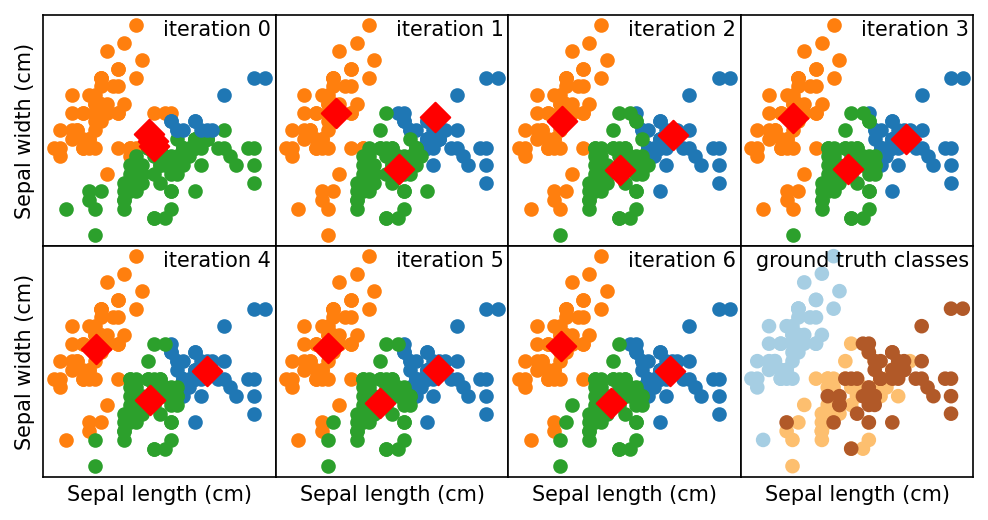

In [9]:
nrow, ncol = 2, 4
fig, axs = plt.subplots(
    nrow, ncol, figsize=(2 * ncol, 2 * nrow), gridspec_kw={"hspace": 0, "wspace": 0}
)
axs = init_ax_style(axs)
for training_iter in range(7):
    ax = axs[training_iter]
    for k, points in hist[training_iter]["clustered_points"].items():
        points = np.array(points)
        ax.scatter(points[:, 0], points[:, 1], color=plt.get_cmap("tab10")(k / 9))
    cluster_centers_i = hist[training_iter]["cluster_centers"]
    ax.scatter(
        cluster_centers_i[:, 0], cluster_centers_i[:, 1], marker="D", c="r", s=100
    )
    axis_text(ax, f"iteration {training_iter}")

axs[-1].scatter(iris.data[:, 0], iris.data[:, 1], alpha=1, c=iris.target, cmap="Paired")
axis_text(axs[-1], "ground truth classes")

# Algorithm: $K$-Means

* __Type__: Unsupervised learning (clustering)
* __Model family__: $K$ centroids
* __Objective function__: Sum of distances to closest centroid
* __Optimizer__: Iterative optimization procedure

$K$-Means has a number of limitations:

* Clustering can get stuck in local minima.
* Measuring clustering quality is hard and relies on heuristics.
* Cluster assignment is binary and doesn't estimate confidence (unlike Gaussian Mixture Models or GMM).

# Beyond $K$-Means

There exist many other kinds of clustering:
* Hierarchical clusters
* Points belonging to multiple clusters (e.g., topics)
* Clusters in graphs

See the `scikit-learn` [guide](https://scikit-learn.org/stable/modules/clustering.html) for more!

<left><img width=25% src="img/cu_logo.svg"></left>
# Part 3: Unsupervised Learning in Practice

We will now look at some practical considerations to keep in mind when applying unsupervised learning.

# Underfitting in Unsupervised Learning

During the hands-on exercise of Lecture 01, we briefly talked about "overfitting".

Underfitting happens when we are not able to fully learn the signal hidden in the data.

In the context of $K$-Means, this means using too few clusters to capture the true structure in the data.

Let's run $K$-Means on our toy dataset.

In [10]:
# fit a K-Means
from sklearn import cluster

X = iris.data
y = iris.target
model = cluster.KMeans(n_clusters=2, n_init="auto")
model.fit(X);

The centroids find two distinct components in the data, but they fail to capture the true structure.

K-Means Objective: 152.35


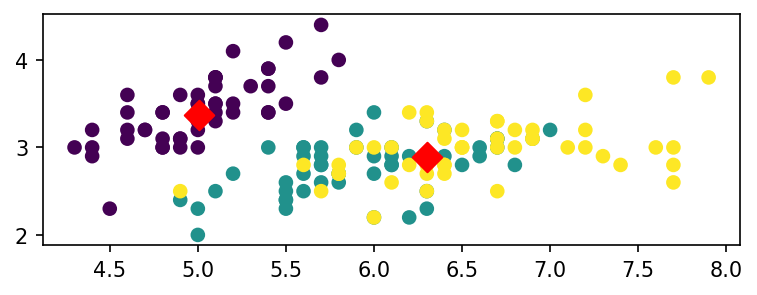

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker="D", c="r", s=100
)
print("K-Means Objective: %.2f" % -model.score(X))

Consider now what happens if we further increase the number of clusters.

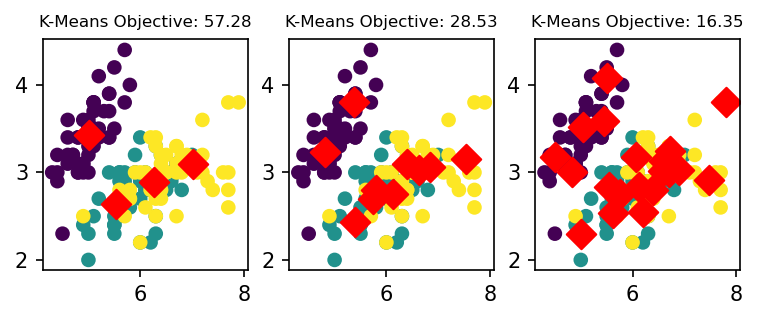

In [12]:
Ks = [4, 10, 20]
f, axes = plt.subplots(1, 3)
for k, ax in zip(Ks, axes):
    model = cluster.KMeans(n_clusters=k, n_init="auto")
    model.fit(X)
    ax.scatter(X[:, 0], X[:, 1], c=y)
    ax.scatter(
        model.cluster_centers_[:, 0],
        model.cluster_centers_[:, 1],
        marker="D",
        c="r",
        s=100,
    )
    ax.set_title("K-Means Objective: %.2f" % -model.score(X), fontsize=8)

# Overfitting in Unsupervised Learning

Overfitting happens when we fit the noise, but not the signal.

In our example, this means identifying small, spurious clusters based on noise rather than the true global clusters.

K-Means Objective: 5.78


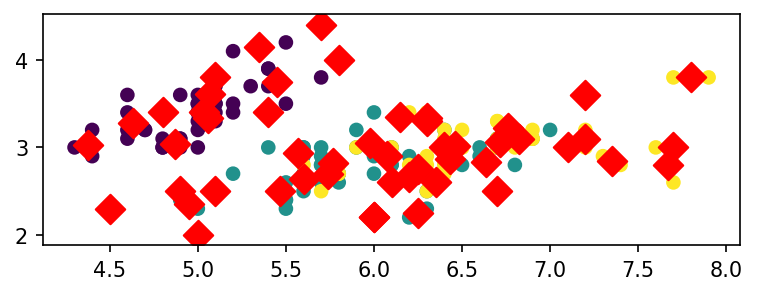

In [13]:
model = cluster.KMeans(n_clusters=50, n_init="auto")
model.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker="D", c="r", s=100
)
print("K-Means Objective: %.2f" % -model.score(X))

# Generalization in Unsupervised Learning

We can think of the data distribution as being the sum of two distinct components $$\mathbb{P} = F + E$$

1. A signal component $F$ (hidden clusters, speech, low-dimensional data space, etc.)
2. A random noise component $E$

A machine learning model
1. **generalizes** if it fits the true signal $F$
2. **overfits** if it learns the noise $E$

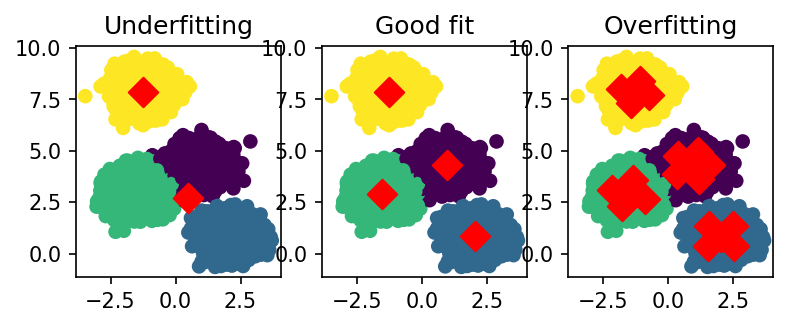

In [14]:
np.random.seed(0)
X, y = datasets.make_blobs(n_samples=10000, centers=4, cluster_std=0.5)

Ks, titles = [2, 4, 20], ["Underfitting", "Good fit", "Overfitting"]
f, axes = plt.subplots(1, 3)
for k, title, ax in zip(Ks, titles, axes):
    model = cluster.KMeans(n_clusters=k, n_init="auto")
    model.fit(X)
    ax.scatter(X[:, 0], X[:, 1], c=y)
    ax.scatter(
        model.cluster_centers_[:, 0],
        model.cluster_centers_[:, 1],
        marker="D",
        c="r",
        s=100,
    )
    ax.set_title(title)

# The Elbow Method

The Elbow method is a way of tuning hyperparameters in unsupervised learning.
* We plot the objective function as a function of the hyperparameter $K$.
* The "elbow" of the curve happens when its rate of decrease substantially slows down.
* The "elbow" is a good guess for the hyperparameter.

In our example, the decrease in objective values slows down after $K=4$, and after that, the curve becomes approximately linear.

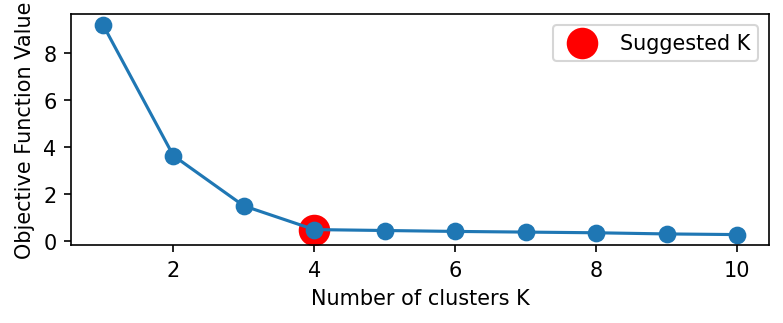

In [15]:
Ks, objs = range(1, 11), []
for k in Ks:
    model = cluster.KMeans(n_clusters=k, n_init="auto")
    model.fit(X)
    objs.append(-model.score(X) / X.shape[0])

plt.plot(Ks, objs, ".-", markersize=15)
plt.scatter([4], [objs[3]], s=200, color="red", label="Suggested K")
plt.xlabel("Number of clusters K")
plt.ylabel("Objective Function Value")
plt.legend()

# The Consensus Index Method

The Consensus Index method is another way to infer the number of clusters in the data.
* For each $K$ value of interest, we run our algorithm multiple times.
* Then we compare how stable the solutions are for the same $K$.
* The $K$ with the most stable solutions (where the agreement is maximized) is a good estimate for $K$.

<p style="font-size: 0.5em;">Nguyen Xuan Vinh et al. Information Theoretic Measures for Clusterings Comparison: Variants, Properties, Normalization and Correction for Chance. 2010. <em>JMLR</em></p>

Let's see how it compares with the Elbow method.
Here we run $K$-Means 10 times for each $K$ value.

In [16]:
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_rand_score as ari

np.random.seed(0)

# we pick a range that is reasonable for our data:
# usually between 2 and sqrt(n)
Ks = range(2, 11)
n_reps = 10
cluster_labels = []
pairwise_ari = []
centroid_positions = {}
stability_scores = []

for k in Ks:
    labels = []
    centroids = []

    for _ in range(n_reps):
        model = cluster.KMeans(n_clusters=k, n_init="auto")
        labels.append(model.fit_predict(X))
        centroids.append(model.cluster_centers_)

    cluster_labels.append(labels)
    centroid_positions[k] = centroids

    # Compute pairwise adjusted Rand index (ARI) for stability
    ari_distances = pdist(labels, metric=ari)
    pairwise_ari.append(ari_distances)
    stability_scores.append(ari_distances.mean())

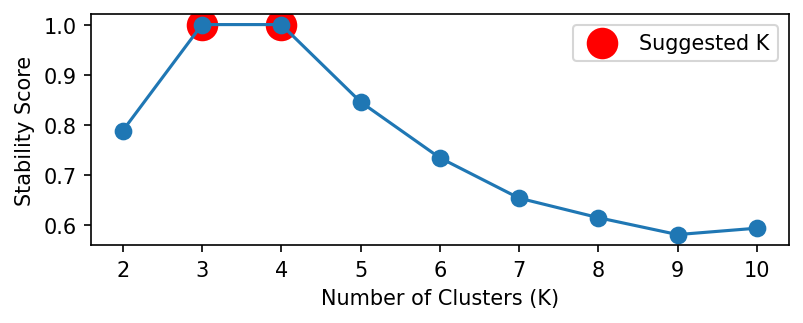

In [17]:
plt.plot(Ks, stability_scores, marker=".", linestyle="-", markersize=15)
plt.scatter(
    [3, 4],
    [stability_scores[1], stability_scores[2]],
    s=200,
    color="red",
    label="Suggested K",
)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Stability Score")
plt.legend()
plt.show()

The Consensus Index suggests $K$ values of 3 or 4. Why $K=3$?

Let's compare the solutions found for $K$ equal to 2, 3, 4, and 5.

In [18]:
k_i = 5  # k index of interest

from scipy.spatial.distance import squareform

p_sim = squareform(pairwise_ari[k_i])
np.fill_diagonal(p_sim, 1.0)
display(pd.DataFrame(p_sim))

,0,1,2,3,4,5,6,7,8,9
0,1.00,0.58,0.59,0.92,0.57,0.67,0.58,0.62,0.77,0.59
1,0.58,1.00,0.55,0.59,0.71,0.59,0.54,0.71,0.57,0.77
2,0.59,0.55,1.00,0.59,0.69,0.71,0.75,0.59,0.66,0.66
3,0.92,0.59,0.59,1.00,0.56,0.68,0.59,0.61,0.76,0.60
4,0.57,0.71,0.69,0.56,1.00,0.59,0.64,0.74,0.75,0.87
5,0.67,0.59,0.71,0.68,0.59,1.00,0.78,0.50,0.72,0.59
6,0.58,0.54,0.75,0.59,0.64,0.78,1.00,0.58,0.67,0.66
7,0.62,0.71,0.59,0.61,0.74,0.50,0.58,1.00,0.55,0.71
8,0.77,0.57,0.66,0.76,0.75,0.72,0.67,0.55,1.00,0.68
9,0.59,0.77,0.66,0.60,0.87,0.59,0.66,0.71,0.68,1.00


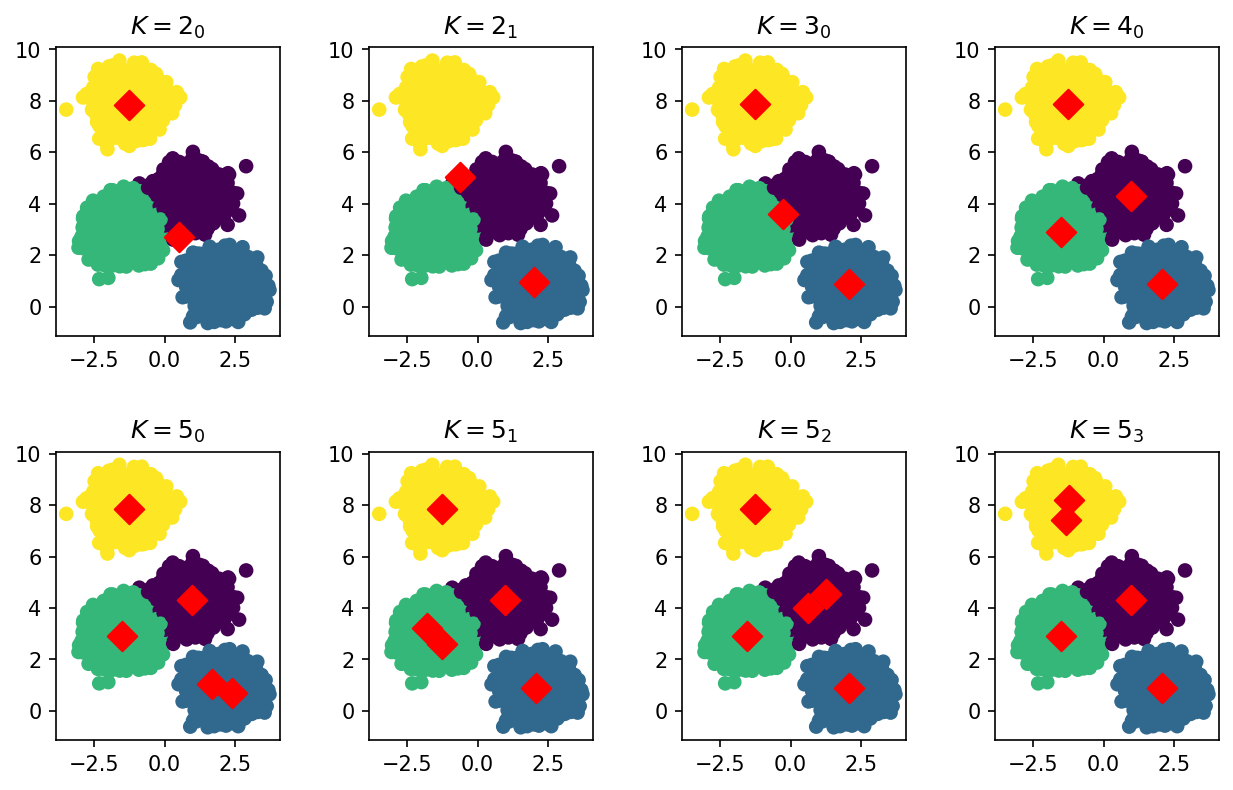

In [19]:
# Define the range of K values and specific initializations to plot
fig, axes = plt.subplots(2, 4, figsize=(10, 6))
Ks_indices = [
    (2, [0, 2]),
    (3, [0]),
    (4, [0]),
    (5, [0, 4, 2, 9]),
]

# Iterate over the configurations for K and specific runs
i = 0
for k, indices in Ks_indices:
    for ii, idx in enumerate(indices):
        centers = centroid_positions[k][idx]
        title = f"$K={k}_{ii}$"
        ax = axes[np.unravel_index(i, (2, 4))]

        ax.scatter(X[:, 0], X[:, 1], c=y)
        ax.scatter(centers[:, 0], centers[:, 1], marker="D", color="red", s=100)
        ax.set_title(title)

        i += 1

plt.subplots_adjust(hspace=0.4, wspace=0.4)

Let's take a look at the data distribution of the clusters.

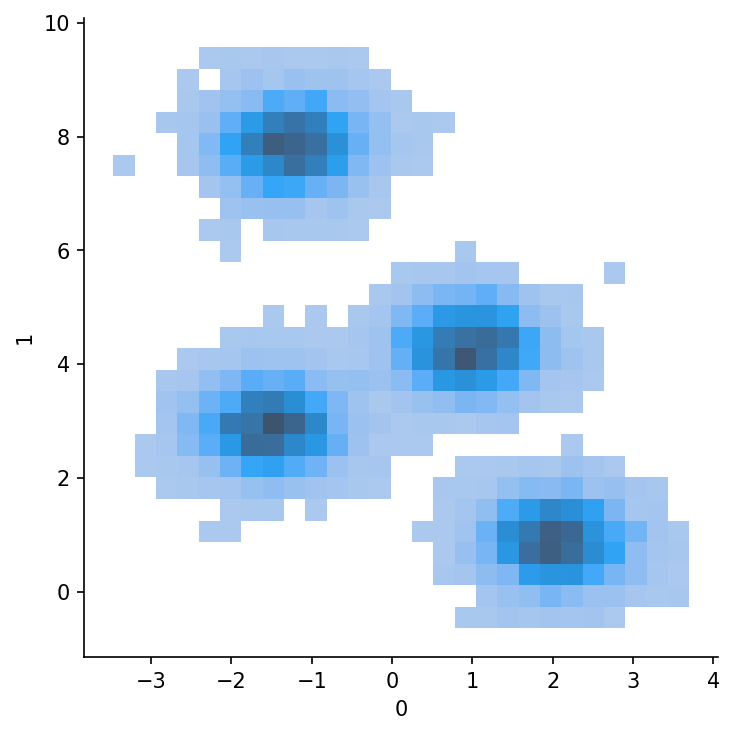

In [20]:
import seaborn as sns

sns.displot(pd.DataFrame(X), x=0, y=1)

# Detecting Overfitting and Underfitting

In unsupervised learning, overfitting and underfitting are more difficult to quantify than in supervised learning.
* Performance may depend on our intuition and require human evaluation.
* If we know the true labels, we can measure the accuracy of the clustering.

How to compare two clustering solutions? There are different metrics:
   * Adjusted Rand Index (ARI): we used it earlier for the Consensus Index method
   * Normalized Mutual Information (NMI)
   * Check out:
     * [More metrics](https://scikit-learn.org/1.5/api/sklearn.metrics.html) (under "Clustering") provided by sklearn
     * [Clustering guide](https://scikit-learn.org/1.5/modules/clustering.html#) in sklearn (under "Clustering performance evaluation").

# Reducing Overfitting

There are multiple ways to control for overfitting:
1. Reduce model complexity (e.g., reduce $K$ in $K$-Means).
2. Penalize complexity in the objective (e.g., penalize large $K$).
3. Use a probabilistic model and regularize it.
4. Use a Consensus Clustering (or Cluster Ensembles) approach.

# Summary

Unsupervised learning tries to find interesting information in __unlabeled__ data.
* Examples include clustering, dimensionality reduction, anomaly detection.
* Algorithms have a similar structure (model, objective, optimizer).
* When we fit the noise instead of the data, we overfit.

# **Hands-on**: $K$-Means

* Open file `lecture03-hands_on-empty.ipynb` and follow the instructions there.
  * This notebook has more challenging datasets (whereas the lecture notebook has toy, easy to understand datasets).
* The "solved" version of the hands-on exercise will appear at noon.
  * This version has explanations and some extra questions.
  * Feel free to play with this and ask questions.

# Anonymous Feedback On This Lecture

<center>
    <img width=60% src="img/feedback_form_qr.png">
</center>

* **Link:** https://forms.office.com/r/prXY35CNuz
* **Lecture number:** 3
* **Lecture topic:** clustering